# Data Insight
***

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer

C:\Users\duos8001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Load the data

In [2]:
directory = r"C:\Users\duos8001\Documents\Python\Machine Learning tutorial\Poverty prediction"
filename = "train.csv"

df = pd.read_csv(join(directory, filename))

In [3]:
df.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

## Resample the data to reduce unexpected bias

In [4]:
df = df.sample(frac=1, random_state=17)

## Split the data into X and y

In [5]:
X = df.drop('Target', axis=1)
y = df['Target']

In [6]:
X.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
4274,ID_3fcf46986,480000.0,0,6,0,1,1,1,1.0,1,...,36,256,1296,16,121,1,1.777778,0.111111,205.44444,1296
8350,ID_9d02c7e76,NaN,0,4,0,1,1,0,NaN,0,...,30,36,900,16,0,4,4.000000,1.000000,36.00000,900
4312,ID_6d3fed02b,94000.0,0,6,0,1,1,1,2.0,1,...,10,16,100,49,121,9,5.444444,0.562500,121.00000,100
8613,ID_f99007794,40000.0,0,4,0,1,1,0,NaN,0,...,28,36,784,25,4,9,6.250000,2.250000,16.00000,784
3616,ID_85110d0dc,NaN,0,2,0,1,1,0,NaN,0,...,17,121,289,9,0,4,9.000000,4.000000,36.00000,289


## Drop columns containing nans

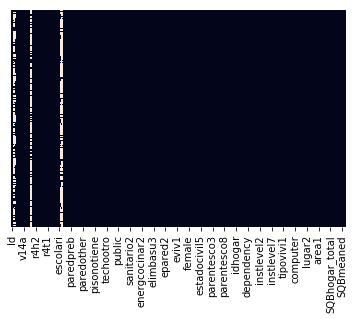

In [7]:
sns.heatmap(X.isnull(), yticklabels=False, cbar=False)

In [8]:
X = X.dropna(axis=1)

In [9]:
X.columns

Index(['Id', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1',
       'r4h2', 'r4h3',
       ...
       'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq'],
      dtype='object', length=137)

## Drop non-numeric columns

In [10]:
acc_dtypes = [np.int64, np.float64]
is_numeric = X.dtypes.apply(lambda x: x in acc_dtypes)
X = X[is_numeric.index[is_numeric]]

In [11]:
X.columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq'],
      dtype='object', length=132)

## Drop redundant columns

In [12]:
redundant = ['SQBage', 'SQBescolari', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency',
            'agesq']
X = X.drop(redundant, axis=1)

In [13]:
X.columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5',
       'lugar6', 'area1', 'area2', 'age'],
      dtype='object', length=124)

## Select 10 best features for visualization

In [14]:
clf = RandomForestClassifier(n_estimators=100)
selector = RFE(clf, n_features_to_select=10, step=4, verbose=1)

In [15]:
selector.fit(X, y)
X_red = selector.transform(X)

Fitting estimator with 124 features.
Fitting estimator with 120 features.
Fitting estimator with 116 features.
Fitting estimator with 112 features.
Fitting estimator with 108 features.
Fitting estimator with 104 features.
Fitting estimator with 100 features.
Fitting estimator with 96 features.
Fitting estimator with 92 features.
Fitting estimator with 88 features.
Fitting estimator with 84 features.
Fitting estimator with 80 features.
Fitting estimator with 76 features.
Fitting estimator with 72 features.
Fitting estimator with 68 features.
Fitting estimator with 64 features.
Fitting estimator with 60 features.
Fitting estimator with 56 features.
Fitting estimator with 52 features.
Fitting estimator with 48 features.
Fitting estimator with 44 features.
Fitting estimator with 40 features.
Fitting estimator with 36 features.
Fitting estimator with 32 features.
Fitting estimator with 28 features.
Fitting estimator with 24 features.
Fitting estimator with 20 features.
Fitting estimator wit

In [16]:
print("Selected {} best features are:\n {}".format(len(X_red[0]), X.columns[selector.get_support()].values))

Selected 10 best features are:
 ['rooms' 'r4h2' 'r4h3' 'r4m3' 'r4t2' 'escolari' 'hogar_nin' 'overcrowding'
 'qmobilephone' 'age']


In [17]:
X_red = pd.DataFrame(dict(zip(X.columns[selector.get_support()].values, X_red.transpose())))

In [30]:
colours = {1:'green',
          2:'yellow',
          3:'orange',
          4:'red'}

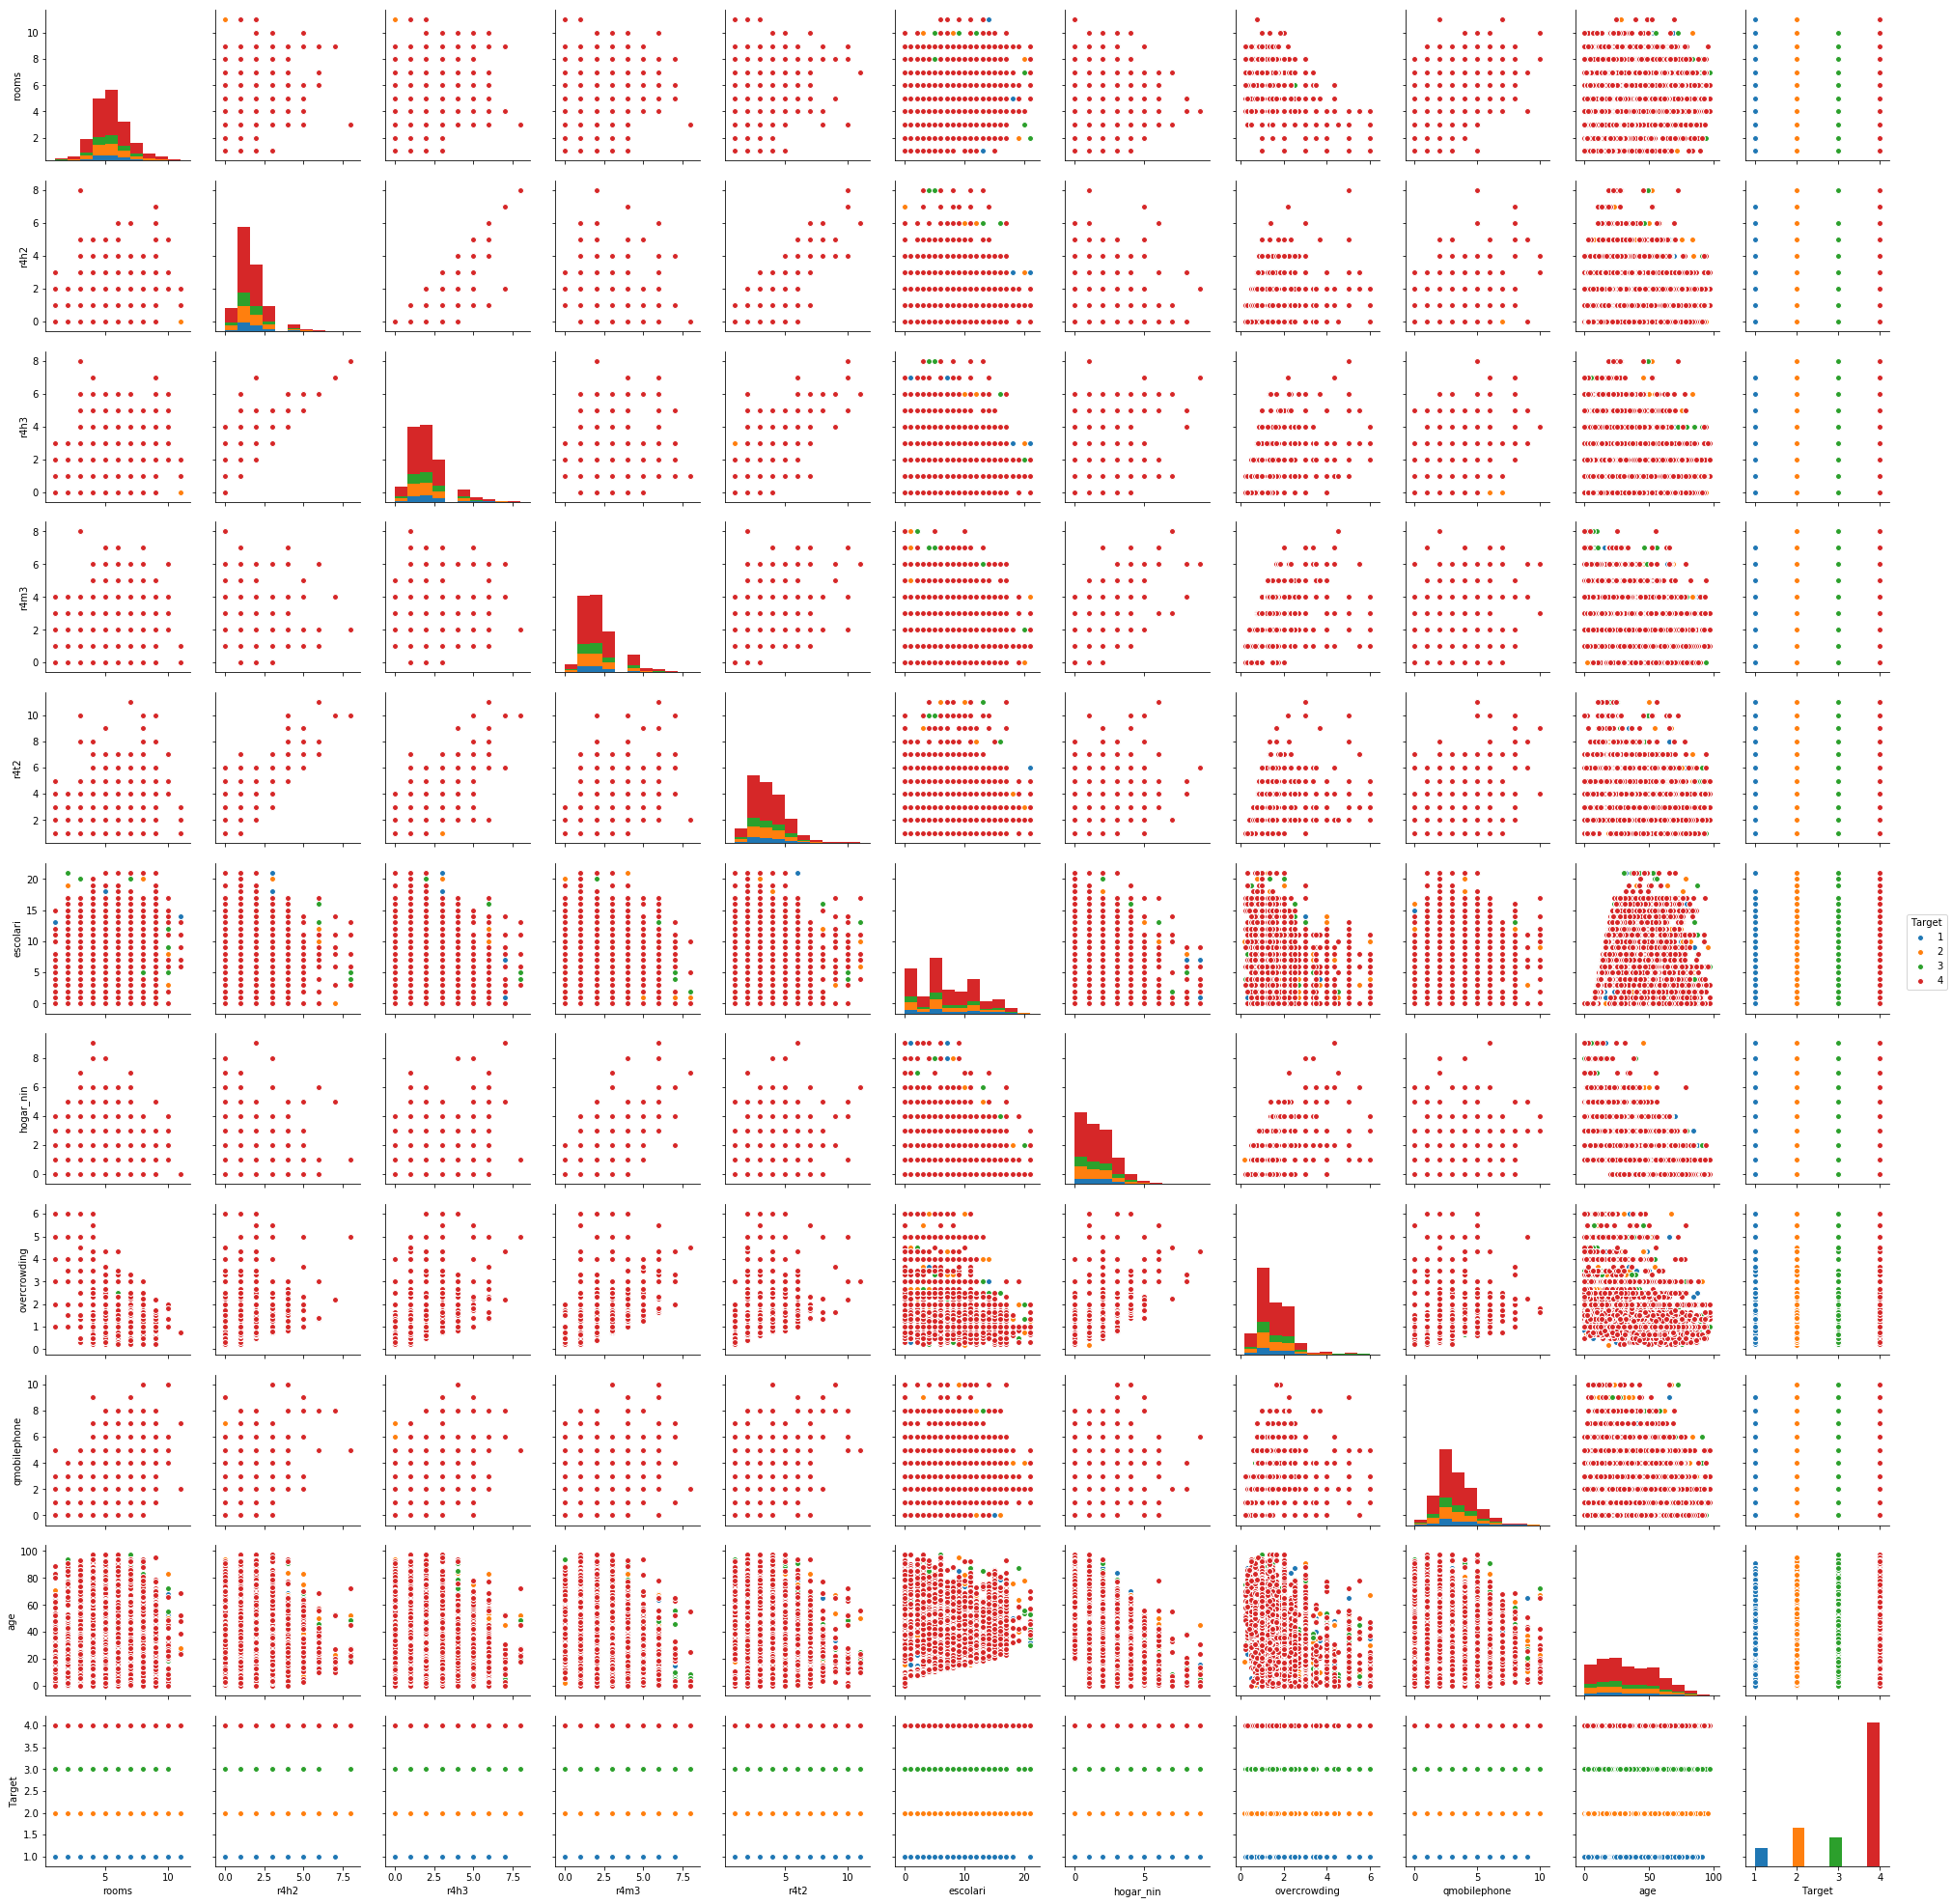

In [37]:
sns.pairplot(pd.concat([X_red, y], axis=1), hue='Target')

# Validation
***

## Train test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle = False, stratify=None)

## Building the model

In [20]:
model = RandomForestClassifier(n_estimators=500)

In [21]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
print("Accuracy of the first prediction is {:.2f}%".format(100*model.score(X_test, y_test)))

Accuracy of the first prediction is 75.99%


In [23]:
f1 = f1_score(y_test, list(model.predict(X_test)), average = 'macro')
print("Macro averaged f1 score of the first prediction is {:.2f}%".format(100*f1))

Macro averaged f1 score of the first prediction is 59.25%


In [24]:
cross_f1 = cross_val_score(model, X, y, scoring='f1_macro', cv=5)
print("Cross validated, macro averaged f1 score of the first prediction is {:.2f}%".format(100*f1))

Cross validated, macro averaged f1 score of the first prediction is 59.25%


# Probability guess prediction for comparison
***
### Takes probability of each class appearing and makes random prediction with the same probability distribution 

In [25]:
y.value_counts(normalize=True)

4    0.627394
2    0.167103
3    0.126504
1    0.079000
Name: Target, dtype: float64

In [26]:
def proba_to_class(value, translator:pd.Series):
    """Takes the given value (from 0 to 1) and translates it to a class, based on a probability of this class occuring
    denoted in the given translator. 
    """
    trans_copy = pd.Series(dict(zip(translator.values, translator.index)))
    trans_copy.index = np.cumsum(trans_copy.index)
    for el in trans_copy.index:
        if value < el:
            return trans_copy[el]

In [27]:
preds_probas_rand = pd.Series(np.random.rand(len(y_test)))
class_probas = y_test.value_counts(normalize=True)
preds_rand = preds_probas_rand.apply(lambda x: proba_to_class(x, class_probas))

In [28]:
f1 = f1_score(y_test, preds_rand, average = 'macro')
print("Macro averaged f1 score of the random prediction is {:.2f}%".format(100*f1))

Macro averaged f1 score of the random prediction is 24.92%
